<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/langchain/Langchain_Mistral_Document_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install -Uqqq pip --progress-bar off
!pip install -qqq torch==2.1 --progress-bar off
!pip install -qqq transformers==4.34.0 --progress-bar off
!pip install -qqq accelerate==0.23.0 --progress-bar off
!pip install -qqq bitsandbytes==0.41.1 --progress-bar off

In [2]:
!pip install sentence-transformers spacy langchain trl datasets pypdf -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 6.1 MB/s eta 0:00:00


In [3]:
from langchain.text_splitter import SentenceTransformersTokenTextSplitter

splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0)

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file = "/content/drive/MyDrive/data/text.txt"
with open(file) as f:
    text = f.read()

In [6]:
count_start_and_stop_tokens = 2
text_token_count = splitter.count_tokens(text=text) - count_start_and_stop_tokens

token_multiplier = splitter.maximum_tokens_per_chunk // text_token_count + 1
text_to_split = text * token_multiplier

text_chunks = splitter.split_text(text=text_to_split)


In [7]:
text_chunks

['madam speaker, madam vice president, our first lady and second gentleman. members of congress and the cabinet. justices of the supreme court. my fellow americans. last year covid - 19 kept us apart. this year we are finally together again. tonight, we meet as democrats republicans and independents. but most importantly as americans. with a duty to one another to the american people to the constitution. and with an unwavering resolve that freedom will always triumph over tyranny. six days ago, russia ’ s vladimir putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. but he badly miscalculated. he thought he could roll into ukraine and the world would roll over. instead he met a wall of strength he never imagined. he met the ukrainian people. from president zelenskyy to every ukrainian, their fearlessness, their courage, their determination, inspires the world. madam speaker, madam vice president, our first lady and second gentlema

In [8]:
# Import libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from langchain.llms import HuggingFacePipeline
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
import transformers
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
device

'cuda'

In [10]:
model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1", load_in_4bit=True, device_map='auto')
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
# Test prompt 1
vegeterian_recipe_prompt = """### Instruction: Act as a gourmet chef.
I have a friend coming over who is a vegetarian.
I want to impress my friend with a special vegetarian dish.
What do you recommend?

Give me two options, along with the whole recipe for each.

 ### Answer:
 """

encoded_instruction = tokenizer(vegeterian_recipe_prompt,  return_tensors="pt", add_special_tokens=True)

model_inputs = encoded_instruction.to(device)

generated_ids = model.generate(**model_inputs, max_new_tokens=1000, do_sample=True, pad_token_id=tokenizer.eos_token_id)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])

/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:224: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


<s> ### Instruction: Act as a gourmet chef. 
I have a friend coming over who is a vegetarian.
I want to impress my friend with a special vegetarian dish. 
What do you recommend?

Give me two options, along with the whole recipe for each.

 ### Answer:
 
Option 1: **Vegetable Paella**

Ingredients:
- 1 cup short-grain white rice
- 2 tablespoons extra-virgin olive oil
- 1 onion, finely chopped
- 2 garlic cloves, minced
- 1 red bell pepper, seeded and diced
- 1 carrot, peeled and diced
- 1 zucchini, diced
- 1 yellow squash, diced
- 1 teaspoon dried saffron threads
- 4 cups vegetable broth
- 1 cup frozen peas
- Salt and pepper to taste
- Chopped parsley for garnish

Instructions:
1. Rinse rice until water runs clear, drain well.
2. Heat olive oil in a large, shallow skillet or Paella pan over medium heat. Add onion, garlic, red bell pepper, and carrot, and cook until vegetables are softened, about 5 minutes.
3. Add rice and dried saffron to the skillet, and stir to coat the rice with onion

In [12]:
PROMPT= """ ### Instruction: Act as a currency expert.

### Question:
Explain to me how Digital Currency works. Assume that I am a 5-year-old child.

 ### Answer:
 """



In [13]:
encoded_instruction = tokenizer(PROMPT,  return_tensors="pt", add_special_tokens=True)

model_inputs = encoded_instruction.to(device)

generated_ids = model.generate(**model_inputs, max_new_tokens=1000, do_sample=True, pad_token_id=tokenizer.eos_token_id)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])

<s>  ### Instruction: Act as a currency expert.

### Question:
Explain to me how Digital Currency works. Assume that I am a 5-year-old child.

 ### Answer:
 
Okay, sweetie, imagine if you have a special token that you can use to buy things online or in a store, but no one else knows about it, and it's just in your computer. That's kind of like what digital currency is! It's like a special type of money that only computers and people with special accounts can use, and it can be used to buy things online or in stores. Like a toy or candy, but digital! And just like any real money, it has value and can be worth lots of dollars or euros. And the best part is that you can have as much as you want, and it's just in your computer. But remember, with anything valuable, you have to be careful and keep it safe, otherwise you might lose it!</s>


In [14]:
text_generation_pipeline = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    temperature=0.2,
    repetition_penalty=1.1,
    return_full_text=True,
    max_new_tokens=1000,

)

In [15]:
mistral_llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

In [16]:
prompt_template = """
### Instruction: Act as a LARGE Language Models Expert. I will ask you a QUESTION and give you an AUDIENCE PERSONA, and you will respond with an answer easily understandable by the AUDIENCE PERSONA.

### AUDIENCE PERSONA:
{audience_persona}

### QUESTION:
{question}

 ### Answer:
 """

In [17]:
# Create prompt from prompt template
prompt = PromptTemplate(
    input_variables=["audience_persona", "question"],
    template=prompt_template,
)

# Create llm chain
llm_chain = LLMChain(llm=mistral_llm, prompt=prompt)

In [18]:
# Input query to LLM
input_text = {
    "audience_persona": "A 5 year-old child",
    "question": "Explain how Large Language Models work."
}

# Generate and print LLM response
response = llm_chain(input_text)


#print(response_text['text'])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [19]:
response['text']

"\nLarge language models are like super smart computers that can understand and talk about anything! They're made up of lots of tiny computers working together, and they learn from all the things people write online. Just like how you learn new things by asking questions and listening to others, these big computers learn by reading and understanding what people say on the internet. And because they're so smart, they can even make up their own words and stories sometimes! It's like having a magic friend who can talk and think for you."

In [20]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("t5-large")
model = T5ForConditionalGeneration.from_pretrained("t5-large")



/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use th

In [58]:
text_summarization_pipeline = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    task="summarization",
    temperature=0.2,
    repetition_penalty=1.1,
      max_new_tokens=1000,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,


)
llm = HuggingFacePipeline(pipeline=text_summarization_pipeline)

In [59]:
prompt = """
Please provide a summary of the following text

TEXT:
Philosophy (from Greek: φιλοσοφία, philosophia, 'love of wisdom') \
is the systematized study of general and fundamental questions, \
such as those about existence, reason, knowledge, values, mind, and language. \
Some sources claim the term was coined by Pythagoras (c. 570 – c. 495 BCE), \
although this theory is disputed by some. Philosophical methods include questioning, \
critical discussion, rational argument, and systematic presentation.
"""

In [60]:
num_tokens = llm.get_num_tokens(prompt)
print (f"Our prompt has {num_tokens} tokens")

Our prompt has 121 tokens


In [61]:
output = llm(prompt)
print (output)

Your max_length is set to 200, but your input_length is only 125. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=62)
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


philosophy is the systematized study of general and fundamental questions . some sources claim term was coined by Pythagoras, although this theory is disputed . philosophical methods include questioning, critical discussion, rational argument .


In [62]:
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import PyPDFLoader

In [63]:
# Load the book
loader = PyPDFLoader("/content/drive/MyDrive/data/IntoThinAirBook.pdf")
pages = loader.load()

# Cut out the open and closing parts
pages = pages[26:277]

# Combine the pages, and replace the tabs with spaces
text = ""

for page in pages:
    text += page.page_content

text = text.replace('\t', ' ')

In [64]:
num_tokens = llm.get_num_tokens(text)

print (f"This book has {num_tokens} tokens in it")

This book has 139734 tokens in it


In [28]:
# Loaders
from langchain.schema import Document

# Splitters
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Model


# Embedding Support
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

# Summarizer we'll use for Map Reduce
from langchain.chains.summarize import load_summarize_chain

# Data Science
import numpy as np
from sklearn.cluster import KMeans

In [30]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=10000, chunk_overlap=3000)

docs = text_splitter.create_documents([text])

In [31]:
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 78 documents


In [32]:
embeddings = HuggingFaceEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in docs])

In [37]:
embeddings.Config

langchain_community.embeddings.huggingface.HuggingFaceEmbeddings.Config

In [36]:
len(vectors[0])

78

In [38]:
# Assuming 'embeddings' is a list or array of 1536-dimensional embeddings

# Choose the number of clusters, this can be adjusted based on the book's content.
# I played around and found ~10 was the best.
# Usually if you have 10 passages from a book you can tell what it's about
num_clusters = 11

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
kmeans.labels_

array([ 6,  6,  6,  6,  0,  0,  6,  0,  0,  4,  6, 10, 10,  5,  6,  6,  5,
        0, 10,  6, 10,  6,  0,  9,  9,  9, 10, 10,  6,  6,  1,  9,  0,  0,
       10,  9,  2,  2,  2,  7,  2,  7,  2,  8,  6,  6,  2,  0,  2,  2,  7,
        7,  8,  7,  2,  0,  8,  2,  2,  7,  2,  2,  8,  6, 10, 10, 10, 10,
        2,  0,  1,  0,  0,  8,  8,  0,  3,  3], dtype=int32)

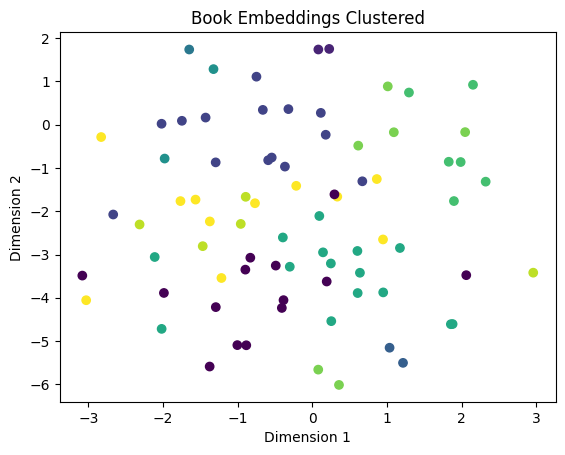

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
# Taking out the warnings
import warnings
from warnings import simplefilter

# Filter out FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(np.array(vectors))

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

In [42]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):

    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)

    # Append that position to your closest indices list
    closest_indices.append(closest_index)

In [43]:
selected_indices = sorted(closest_indices)
selected_indices

[9, 11, 13, 31, 33, 45, 49, 50, 52, 70, 76]

In [44]:
map_prompt = """
You will be given a single passage of a book. This section will be enclosed in triple backticks (```)
Your goal is to give a summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
FULL SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [45]:
map_chain = load_summarize_chain(llm=llm,
                             chain_type="stuff",
                             prompt=map_prompt_template)

In [46]:
selected_docs = [docs[doc] for doc in selected_indices]

In [47]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):

    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])

    # Append that summary to your list
    summary_list.append(chunk_summary)

    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
Token indices sequence length is longer than the specified maximum sequence length for this model (2596 > 512). Running this sequence through the model will result in indexing errors
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #0 (chunk #9) - Preview: sherpas are a mountain people, devoutly Buddhist, whose forebears migrated south from Tibet . the 1921 expedition hired a large corps of Sherpas as load bearers and camp helpers . despite the hazards, most sought-after jobs are the half dozen opening 



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #1 (chunk #11) - Preview: a young sherpa fell 150 feet into a crevasse while scouting a route up the Lhotse face . john sutter: "without the support of our sherpas none of us has any chance of climbing" he says the rescuers were untrained and didn't know what they were doing  



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #2 (chunk #13) - Preview: cnn's john sutter talks with a climber about his experience at everest base camp . he recalls how a commercial expedition helped clean up the mountain . in 1996, he and a friend led a group of climbers to the top of the world's highest peak . the two 



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #3 (chunk #31) - Preview: bob greene: sherpas on a 1996 expedition blamed a climber for his uncle's illness . he says they believed the climber had angered the goddess of the sky, Sagarmatha . greene says the sex was ok, but he said it was bad luck for the rest of the team .  



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #4 (chunk #33) - Preview: cnn's john sutter recalls his experience climbing the world's highest peak . he says climbing is about enduring pain and a sense of mission, not fame or fortune . one climber, Dale Kruse, suffered from high altitude cerebral edema . "it was like i wa 



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #5 (chunk #45) - Preview: cnn's john sutter recalls his epic climb of everest in 1996 . he says the climb was hampered by a lack of oxygen on the mountain's slopes . but he recalls a moment when he realized his oxygen supply was running low . the climb ended with a sigh of re 



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #6 (chunk #49) - Preview: cnn's john sutter asks readers to give a summary of a passage in a book . he recalls the day that a climber collapsed on the summit of mt. everest . the climber had been suffering from a gastrointestinal parasite at the time, he says . after the clim 



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #7 (chunk #50) - Preview: cnn's john sutter talks with a climber who lost his group in a blizzard . the climbers had strayed too far from the ridge to reach the tents at camp four . they were dragged down the slope by a group of climbers who had run out of oxygen . despite th 



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #8 (chunk #52) - Preview: bob greene: the story of the 1996 climb of the south col is a fascinating one . he says the climbers who went missing were rescued by a group of sherpas . greene says the rescuers were unable to find their way back to camp . 



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #9 (chunk #70) - Preview: aaron carroll: critics of Into thin air have questioned author's credibility . he says he's rebutted Into Thin air's numerous errors; he regrets that . but he writes that he was trying to tell the story as accurately and honestly as possible . carrol 



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Summary #10 (chunk #76) - Preview: eric liu: Boukreev was a global nomad in pursuit of mountains and money to make ends meet . he says after death of his friend, he decided to try a new route on Annapurna's south face . they were met with avalanche danger, but he persevered and made t 



In [48]:
summaries = "\n".join(summary_list)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 764 tokens


In [49]:
text_summarization_pipeline2 = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    task="summarization",
    temperature=0.2,
    repetition_penalty=1.1,
      max_new_tokens=1000,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,

)
llm2 = HuggingFacePipeline(pipeline=text_summarization_pipeline2)

In [50]:
combine_prompt = """
You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
Your goal is to give a verbose summary of what happened in the story.
The reader should be able to grasp what happened in the book.

```{text}```
VERBOSE SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [51]:
reduce_chain = load_summarize_chain(llm=llm2,
                             chain_type="stuff",
                             prompt=combine_prompt_template,
                             verbose=True # Set this to true if you want to see the inner workings
                                   )

In [52]:
output = reduce_chain.run([summaries])



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
Your goal is to give a verbose summary of what happened in the story.
The reader should be able to grasp what happened in the book.

```sherpas are a mountain people, devoutly Buddhist, whose forebears migrated south from Tibet . the 1921 expedition hired a large corps of Sherpas as load bearers and camp helpers . despite the hazards, most sought-after jobs are the half dozen openings for climbing Sherpa .
a young sherpa fell 150 feet into a crevasse while scouting a route up the Lhotse face . john sutter: "without the support of our sherpas none of us has any chance of climbing" he says the rescuers were untrained and didn't know what they were doing .
cnn's john sutter talks with a climber about his experience at everest base camp . he recalls how a commercial expedition

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



> Finished chain.

> Finished chain.


In [53]:
print (output)

you will be given a series of summaries from a book . your goal is to give a verbose summary of what happened in the story . cnn's john sutter recalls his epic climb of mt. everest in 1996 .
